In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from enum import Enum

In [2]:
class Colors(Enum):
    blue = '#0A85FF'
    darkblue = '#00264D'
    green = '#99CC00'
    darkgreen = '#739900'

In [3]:
battleground_path = 'all-state-changes.csv'
df = pd.read_csv(battleground_path)

In [4]:
df

,state,timestamp,leading_candidate_name,trailing_candidate_name,leading_candidate_votes,trailing_candidate_votes,vote_differential,votes_remaining,new_votes,new_votes_relevant,new_votes_formatted,leading_candidate_partition,trailing_candidate_partition,precincts_reporting,precincts_total,hurdle,hurdle_change,hurdle_mov_avg,counties_partition,total_votes_count
0,Alaska (EV: 3),2020-12-02 19:04:28.768000,Trump,Biden,189951,153778,36173,31816,0,0,0,0.000000,0.000000,441,441,1.094604,0.000000,0.494467,{},359530
1,Alaska (EV: 3),2020-12-02 17:18:21.996000,Trump,Biden,189951,153778,36173,31816,0,0,0,0.000000,0.000000,441,441,1.094604,0.000000,0.494467,{},359530
2,Alaska (EV: 3),2020-12-02 16:33:22.842000,Trump,Biden,189951,153778,36173,31816,0,0,0,0.000000,0.000000,441,441,1.094604,0.000000,0.494467,{},359530
3,Alaska (EV: 3),2020-12-02 15:22:19.152000,Trump,Biden,189951,153778,36173,31816,2304,587,587,0.226576,0.773424,441,441,1.094604,0.035231,0.494467,"{'ED 10': 51, 'ED 37': 102, 'ED 39': 119, 'ED ...",359530
4,Alaska (EV: 3),2020-12-01 18:45:19.099000,Trump,Biden,189818,153324,36494,34120,58,0,0,0.000000,0.000000,424,441,1.059373,0.000949,0.488333,{'ED 6': 58},357226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,Wyoming (EV: 3),2020-11-11 22:19:53.904000,Trump,Biden,193559,73491,120068,0,0,0,0,0.000000,0.000000,483,483,0.000000,0.000000,0.154079,{},276765
3402,Wyoming (EV: 3),2020-11-11 21:14:13.744000,Trump,Biden,193559,73491,120068,0,84,0,0,0.000000,0.000000,444,483,0.000000,-741.190169,0.154079,"{'Laramie': 1, 'Sweetwater': 83}",276765
3403,Wyoming (EV: 3),2020-11-11 20:39:54.585000,Trump,Biden,193559,73491,120068,84,153,151,151,0.695364,0.304636,444,483,741.190169,478.296072,0.154079,"{'Albany': 5, 'Campbell': 2, 'Carbon': 2, 'Con...",276681
3404,Wyoming (EV: 3),2020-11-06 02:50:08.240000,Trump,Biden,193454,73445,120009,237,185,180,180,0.972222,0.027778,444,483,262.894097,115.239337,0.027778,{'Niobrara': 185},276528


In [5]:
df['state'].value_counts()

Pennsylvania (EV: 20)           336
Georgia (EV: 16)                226
Minnesota (EV: 10)              188
Washington (EV: 12)             150
New Jersey (EV: 14)             145
California (EV: 55)             144
Connecticut (EV: 7)             131
Massachusetts (EV: 11)          126
Virginia (EV: 13)               106
Maryland (EV: 10)                98
Maine (EV: 4)                    96
Kansas (EV: 6)                   93
Arizona (EV: 11)                 86
Arkansas (EV: 6)                 86
New York (EV: 29)                82
Michigan (EV: 16)                77
Iowa (EV: 6)                     76
Colorado (EV: 9)                 73
Illinois (EV: 20)                70
North Carolina (EV: 15)          66
New Hampshire (EV: 4)            65
South Carolina (EV: 9)           64
Mississippi (EV: 6)              63
Kentucky (EV: 8)                 57
Texas (EV: 38)                   56
Utah (EV: 6)                     54
Indiana (EV: 11)                 51
Florida (EV: 29)            

In [6]:
df['leading_candidate_name'].value_counts()

Biden    2181
Trump    1225
Name: leading_candidate_name, dtype: int64

In [7]:
df['trailing_candidate_name'].value_counts()

Trump    2181
Biden    1225
Name: trailing_candidate_name, dtype: int64

In [8]:
df.describe()

,leading_candidate_votes,trailing_candidate_votes,vote_differential,votes_remaining,new_votes,new_votes_relevant,leading_candidate_partition,trailing_candidate_partition,precincts_reporting,precincts_total,hurdle,hurdle_change,hurdle_mov_avg,total_votes_count
count,3.406000e+03,3.406000e+03,3.406000e+03,3.406000e+03,3.406000e+03,3.406000e+03,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3406.000000,3325.000000,3.406000e+03
mean,2.276920e+06,1.742389e+06,5.345314e+05,2.739800e+05,6.180686e+03,6.018867e+03,0.479651,0.367677,4474.730182,4859.227540,232.349973,151.893451,0.438482,4.090233e+06
std,2.023642e+06,1.367471e+06,9.360829e+05,6.615177e+05,4.120619e+04,3.997961e+04,3.407432,3.404922,4219.765658,4651.540299,7219.562663,7318.807917,0.174804,3.382853e+06
min,8.099900e+04,1.280200e+04,4.630000e+02,-1.940020e+05,-6.232130e+05,-6.204510e+05,-74.000000,-181.666667,96.000000,144.000000,0.000000,-74992.411864,-1.833333,1.324750e+05
25%,8.970120e+05,6.806135e+05,8.126000e+04,9.678750e+03,7.000000e+00,4.000000e+00,0.258859,0.190538,1729.250000,1993.000000,0.746943,0.000000,0.333333,1.686734e+06
50%,1.803942e+06,1.464540e+06,2.921675e+05,6.614200e+04,3.180000e+02,2.900000e+02,0.491881,0.409723,2644.000000,2662.000000,1.763060,0.003520,0.447734,3.272434e+06
75%,2.737416e+06,2.462375e+06,6.150982e+05,2.057188e+05,3.337250e+03,3.177500e+03,0.666667,0.575098,6941.750000,7436.000000,7.372296,0.090210,0.533433,5.396700e+06
max,1.110976e+07,6.005961e+06,5.104002e+06,5.647390e+06,1.627768e+06,1.587147e+06,182.666667,75.000000,20498.000000,20498.000000,405718.445087,405702.966760,1.000000,1.749591e+07


In [9]:
# Restructure data frame for easier access to Biden and Trump votes

def get_candidate_votes(row):
    if row['leading_candidate_name'] == 'Biden':
        row['biden_votes'] = row['leading_candidate_votes']
        row['trump_votes'] = row['trailing_candidate_votes']
    elif row['leading_candidate_name'] == 'Trump':
        row['biden_votes'] = row['trailing_candidate_votes']
        row['trump_votes'] = row['leading_candidate_votes']
    return row

df = df.apply(get_candidate_votes, axis=1)

In [10]:
df

,state,timestamp,leading_candidate_name,trailing_candidate_name,leading_candidate_votes,trailing_candidate_votes,vote_differential,votes_remaining,new_votes,new_votes_relevant,...,trailing_candidate_partition,precincts_reporting,precincts_total,hurdle,hurdle_change,hurdle_mov_avg,counties_partition,total_votes_count,biden_votes,trump_votes
0,Alaska (EV: 3),2020-12-02 19:04:28.768000,Trump,Biden,189951,153778,36173,31816,0,0,...,0.000000,441,441,1.094604,0.000000,0.494467,{},359530,153778,189951
1,Alaska (EV: 3),2020-12-02 17:18:21.996000,Trump,Biden,189951,153778,36173,31816,0,0,...,0.000000,441,441,1.094604,0.000000,0.494467,{},359530,153778,189951
2,Alaska (EV: 3),2020-12-02 16:33:22.842000,Trump,Biden,189951,153778,36173,31816,0,0,...,0.000000,441,441,1.094604,0.000000,0.494467,{},359530,153778,189951
3,Alaska (EV: 3),2020-12-02 15:22:19.152000,Trump,Biden,189951,153778,36173,31816,2304,587,...,0.773424,441,441,1.094604,0.035231,0.494467,"{'ED 10': 51, 'ED 37': 102, 'ED 39': 119, 'ED ...",359530,153778,189951
4,Alaska (EV: 3),2020-12-01 18:45:19.099000,Trump,Biden,189818,153324,36494,34120,58,0,...,0.000000,424,441,1.059373,0.000949,0.488333,{'ED 6': 58},357226,153324,189818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3401,Wyoming (EV: 3),2020-11-11 22:19:53.904000,Trump,Biden,193559,73491,120068,0,0,0,...,0.000000,483,483,0.000000,0.000000,0.154079,{},276765,73491,193559
3402,Wyoming (EV: 3),2020-11-11 21:14:13.744000,Trump,Biden,193559,73491,120068,0,84,0,...,0.000000,444,483,0.000000,-741.190169,0.154079,"{'Laramie': 1, 'Sweetwater': 83}",276765,73491,193559
3403,Wyoming (EV: 3),2020-11-11 20:39:54.585000,Trump,Biden,193559,73491,120068,84,153,151,...,0.304636,444,483,741.190169,478.296072,0.154079,"{'Albany': 5, 'Campbell': 2, 'Carbon': 2, 'Con...",276681,73491,193559
3404,Wyoming (EV: 3),2020-11-06 02:50:08.240000,Trump,Biden,193454,73445,120009,237,185,180,...,0.027778,444,483,262.894097,115.239337,0.027778,{'Niobrara': 185},276528,73445,193454


In [11]:
class LinearRegression():
    def __init__(self, w, b):
        self.w = w
        self.b = b

    def fit(X,y):
        '''
        Input: 2-D (NxM) X: Each row represents an observation
        and the number of columns the features.
        Output: LinearRegretion y = w*x + b where w and b minimize the
        loss function L = 1/n*sqrt[sum(y_i - |x_i*w + b|_2^2)] 
        using the pseudoinverse method.

        Linear Regression:
        y = w*x + b --> y = w_hat*x
        w_hat is the pseudoinverse of x_hat 
        which is X with one extra dimention for bias b.
        '''
        bias_col = np.ones([X.shape[0],1])
        X_hat = np.concatenate((X,bias_col),axis=1)
        Xpinv = np.linalg.pinv(X_hat)
        w_hat = np.dot(Xpinv,y)
        w = w_hat[:-1]
        b = w_hat[-1]
        return LinearRegression(w,b)
  
    def predict(self,x):
        """ 
        Input 1-D (array) or 2-D (matrtix) X 
        Return prediction: y = w*x + b
        """
        # X sould be N-D array and b is a 1-D array, it is a sum product over the last axis of a and b
        y = np.dot(x,self.w) + self.b
        return y


/var/folders/c4/jkw5wy1d7lndc6p4y832vmrc0000gn/T/ipykernel_7341/2128005972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_py['percent_reporting'] = df_py['total_votes_count'] / int(7e+6)
/var/folders/c4/jkw5wy1d7lndc6p4y832vmrc0000gn/T/ipykernel_7341/2128005972.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_py['trump_lead'] = (df_py['trump_votes'] - df_py['biden_votes']) / df_py['total_votes_count']
/var/folders/c4/jkw5wy1d7lndc6p4y832vmrc0000gn/T/ipykernel_7341/2128005972.py:19: SettingWith

Text(0.5, 0, "Trump's percentage lead")

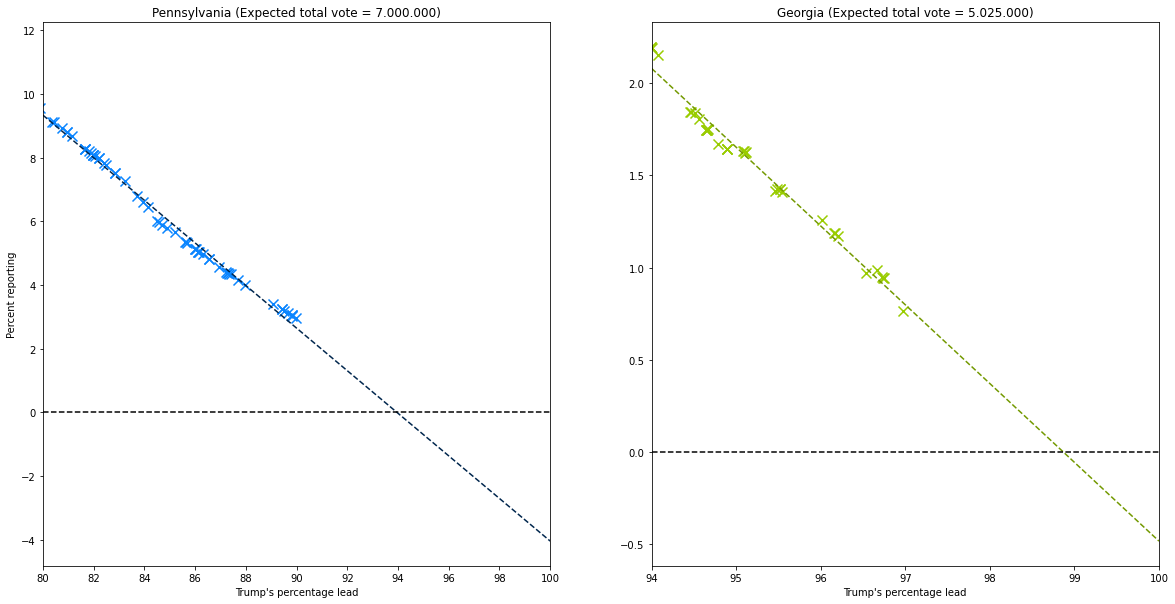

In [14]:
#Pennsylvania
df_py = df[df['state'] == 'Pennsylvania (EV: 20)']
df_py['percent_reporting'] = df_py['total_votes_count'] / int(7e+6)
df_py['trump_lead'] = (df_py['trump_votes'] - df_py['biden_votes']) / df_py['total_votes_count']
df_py = df_py.sort_values('percent_reporting', axis=0, ascending=False)

# Only view votes that were counted before 90% were reported
df_py = df_py[df_py['percent_reporting'] <= 0.9]

X = df_py['percent_reporting'].to_numpy().reshape([-1, 1])
y = df_py['trump_lead'].to_numpy()

# Fit X to y using Linear Regression
linear_py = LinearRegression.fit(X, y)


#Georgia
df_ga = df[df['state'] == 'Georgia (EV: 16)']
df_ga['percent_reporting'] = df_ga['total_votes_count'] / int(5.025e+6)
df_ga['trump_lead'] = (df_ga['trump_votes'] - df_ga['biden_votes']) / df_ga['total_votes_count']
df_ga = df_ga.sort_values('percent_reporting', axis=0, ascending=False)

# Only view votes that were counted before 97% were reported
df_ga = df_ga[df_ga['percent_reporting'] <= 0.97]

X = df_ga['percent_reporting'].to_numpy().reshape([-1, 1])
y = df_ga['trump_lead'].to_numpy()

# Fit X to y using Linear Regression
linear_ga = LinearRegression.fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(df_py['percent_reporting'] * 100, df_py['trump_lead'] * 100, marker='x', s=100, color=Colors.blue.value)
x = np.linspace(0.8, 1, 100).reshape([-1,1])
y = linear_py.predict(x)
ax[0].set_xlim([85, 100])
ax[0].set_xticks(range(80, 101, 2))
ax[0].plot(x * 100, y * 100, linestyle='--', color=Colors.darkblue.value)
ax[0].hlines(y=0, xmin=80, xmax=100, linestyle='--', color='black')
ax[0].set_title('Pennsylvania (Expected total vote = 7.000.000)')

ax[1].scatter(df_ga['percent_reporting'] * 100, df_ga['trump_lead'] * 100, marker='x', s=100, color=Colors.green.value)
x = np.linspace(0.94, 1, 100).reshape([-1,1])
y = linear_ga.predict(x)
ax[1].set_xlim([94, 100])
ax[1].set_xticks(range(94, 101, 1))
ax[1].plot(x * 100, y * 100, linestyle='--', color=Colors.darkgreen.value)
ax[1].hlines(y=0, xmin=94, xmax=100, linestyle='--', color='black')
ax[1].set_title('Georgia (Expected total vote = 5.025.000)')

ax[0].set_ylabel("Percent reporting")
ax[0].set_xlabel("Trump's percentage lead")
ax[1].set_xlabel("Trump's percentage lead")
# plt.savefig('trump_lead.svg', transparent=True)

At what percentage of reported votes will Biden lead over Trump?